## Customer Click Prediction on Advertisement 

### Introduction

Pada Final Project ini kita menggunakan data dari marketing Agency untuk membuat machine learning algoritma untuk mempredik customer click prediction.

Ada 10 Feature pada dataset ini yaitu:
1. <b>Daily Time Spent on Site</b>: consumer time on site in minutes
2. <b>Age</b>: cutomer age in years
3. <b>Area Income</b>: Avg. Income of geographical area of consumer
4. <b>Daily Internet Usage</b>: Avg. minutes a day consumer is on the internet
5. <b>Ad Topic Line</b>: Headline of the advertisement
6. <b>City</b>: City of consumer
7. <b>Male</b>: Whether or not consumer was male
8. <b>Country</b>: Country of consumer
9. <b>Timestamp</b>: Time at which consumer clicked on Ad or closed window
10. <b>Clicked on Ad</b>: 0 or 1 indicated clicking on Ad  

Target feature dari dataset ini adalah 'Clicked on Ad'. ada 2 variabel dalam feature ini yaitu 0 dan 1 yang dimana 0 berarti pengunjung tidak klik iklan dan 1 pengunjung yang mengklik iklan

# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('advertising.csv')
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [3]:
df.shape

(1000, 10)

### Null Values Check

In [4]:
df.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


# EDA

In [6]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


Dari data describe ini bisa kita lihat yaitu:
- rata2 pengunjung dari website ini ada di <b>36 tahun</b>, bisa kita asumsikan website ini mentargetkan usia dewasa
- Kalau dari fitur Area Income bisa dilihat <b>min 13.996 dan max 79.484</b>, bisa dikategorikan website ini untuk semua umur
- dalam fitur Daily Time Spent on site bisa kita simpulkan website ini merupakan website yang populer karena minimal time spent adalah <b>32 menit dan maximal 91 menit</b>

In [7]:
df['Clicked on Ad'].value_counts()

1    500
0    500
Name: Clicked on Ad, dtype: int64

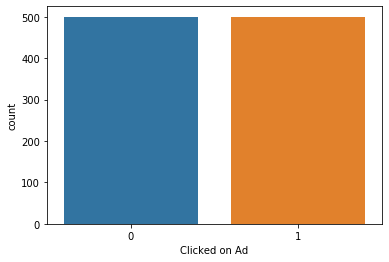

In [8]:
sns.countplot(x = 'Clicked on Ad',data=df)

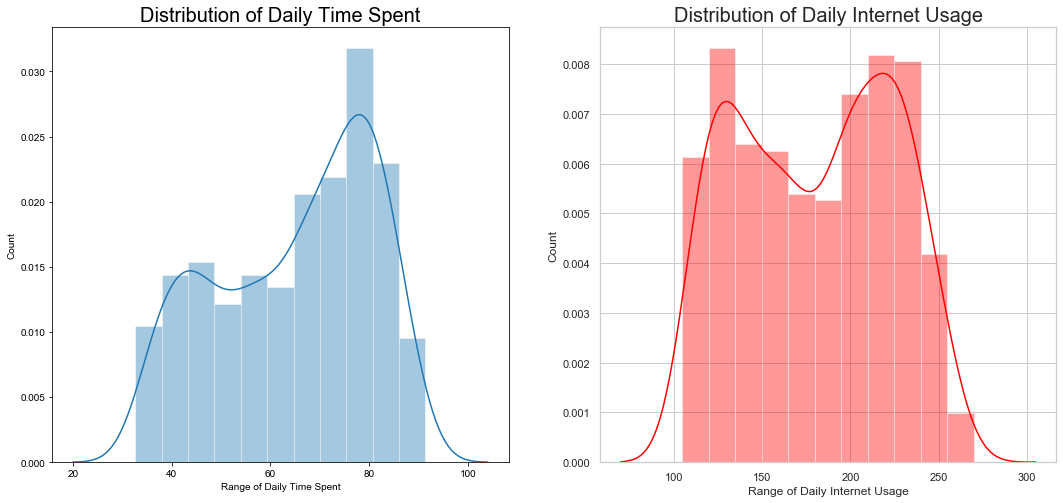

In [9]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(df['Daily Time Spent on Site'])
plt.title('Distribution of Daily Time Spent', fontsize = 20)
plt.xlabel('Range of Daily Time Spent')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(df['Daily Internet Usage'], color = 'red')
plt.title('Distribution of Daily Internet Usage', fontsize = 20)
plt.xlabel('Range of Daily Internet Usage')
plt.ylabel('Count')
plt.show()

### Correlation between variable

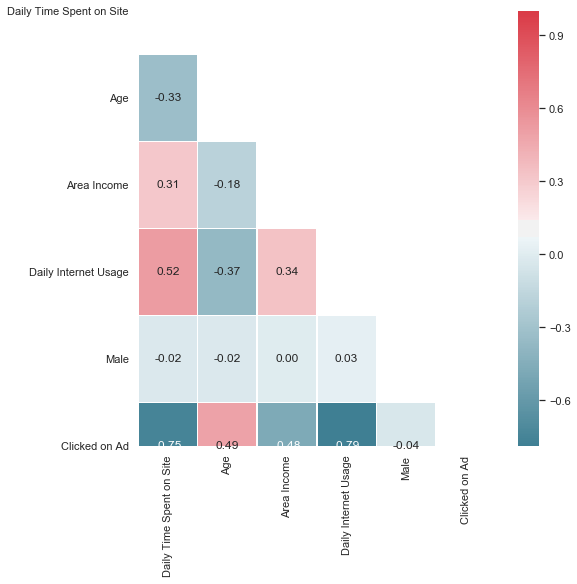

In [10]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

In [11]:
df.corr().abs()['Clicked on Ad'].sort_values(ascending = False)

Clicked on Ad               1.000000
Daily Internet Usage        0.786539
Daily Time Spent on Site    0.748117
Age                         0.492531
Area Income                 0.476255
Male                        0.038027
Name: Clicked on Ad, dtype: float64

Dari hasil korelasi diatas dapt kita tarik fitur fitur mana saja yang dapat kita pasangkan untuk melihat klik-nya, seperti kita bisa pasangkan fitur Age dan Daily time spent berdasarkan clicked on ad. Serta Daily internet usage dan juga daily time.

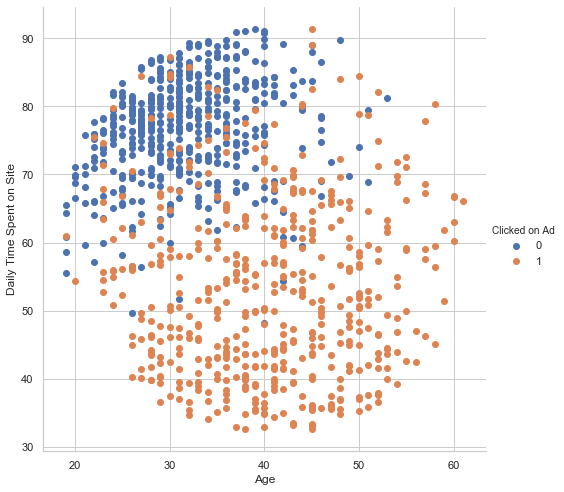

In [12]:
sns.set_style();
sns.FacetGrid(df, hue='Clicked on Ad',size=7).map(plt.scatter, 'Age', 'Daily Time Spent on Site').add_legend()

Bisa dilihat dari plot ini pengunjung yang mengklik ad adalah yang daily time spentnya sedikit. Berati website ini sudah bagus dalam UI dan UXnya jadi lebih efisien dalam penggunaannya.

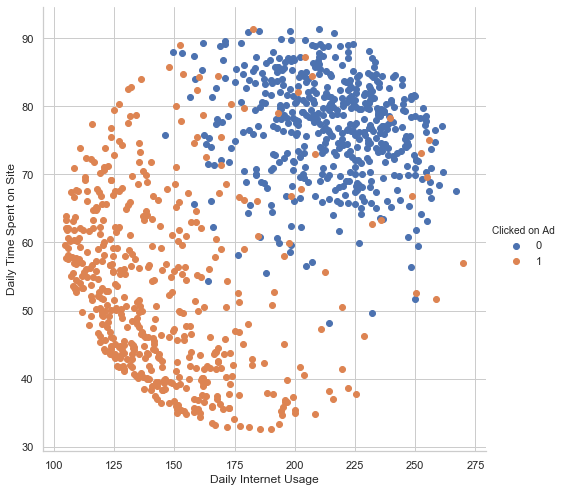

In [13]:
sns.set_style();
sns.FacetGrid(df, hue='Clicked on Ad',size=7).map(plt.scatter, 'Daily Internet Usage', 'Daily Time Spent on Site').add_legend()

Dapat dilihat dari plot ini pengunjung yang daily internet usage-nya rendah kebanyakan mengklik ad. Ini memperkuat bahwa website ini sangat efisien dalam penggunaannya

### Trying to see variable object

In [14]:
fitur_object = ['Ad Topic Line', 'City', 'Country']
df[fitur_object].describe()

,Ad Topic Line,City,Country
count,1000,1000,1000
unique,1000,969,237
top,Optimized static archive,Lisamouth,France
freq,1,3,9


- Terdapat 237 negara yang mengakses website ini dengan republik ceko yang terbanyak.
- Pada fitur Ad Topic Line dan City hampir semuanya unique value. Karena terlalu banyak varian kita bisa dapat simpulkan kedua fitur ini susah untuk melakukan predik karena tidak adanya pattern.

In [15]:
pd.crosstab(index=df['Country'], columns='count').sort_values(['count'], ascending=False).head(20)

col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
South Africa,8
Senegal,8
Peru,8
Micronesia,8


In [16]:
pd.crosstab(df['Country'], df['Clicked on Ad']).sort_values(1, ascending=False).head(20)

Clicked on Ad,0,1
Country,,
Australia,1,7
Turkey,1,7
Ethiopia,0,7
Liberia,2,6
South Africa,2,6
Liechtenstein,0,6
Senegal,3,5
Peru,3,5
Mayotte,1,5


- Kita lihat dari 237 negara dari data kita tidak ada 1 negara yang terlalu dominan semuanya saling mendekati
- Dan dari banyaknya negara yang meng-klik keseluruhan tidak ada yg terlalu dominan juga
- Karena terlalu banyaknya negara yang berbeda dan tidak ada yg dominan kita tidak akan menganalisa lebih lanjut fitur country ini dikarenakan mungkin akan mengganggu kerja dari ML

# Preprocessing Data

### Age Classification

mengklasifikasikan fitur Age agar data lebih akurat dalam modeling dikarenakan ML bekerja lebih baik dengan numerical

In [17]:
pd.crosstab(df['Age'], columns='count').sort_values('count', ascending=False)

col_0,count
Age,
31,60
36,50
28,48
29,48
33,43
35,39
34,39
30,39
32,38


In [18]:
df['Age'].sort_values().unique()

array([19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61], dtype=int64)

In [19]:
df['Age_labels'] = pd.cut(x=df['Age'], bins=[15, 27, 45, 100], labels=['Young', 'Adult', 'Old'], right=False)

print(df['Age_labels'].unique())

[Adult, Young, Old]
Categories (3, object): [Young < Adult < Old]


In [20]:
df['Age_labels'].value_counts()

Adult    678
Old      187
Young    135
Name: Age_labels, dtype: int64

- Kita klasifikasikan menjadi 3 kategori yaitu young (15-27), Adult (28-45), Old (45-100)
- klasifikasi ini berdasarkan klasifikasi yang dibuat oleh WHO

In [21]:
from sklearn.preprocessing import LabelEncoder

df['Age_label_encoded'] = LabelEncoder().fit_transform(df['Age_labels'])
df.head()

# 0 = Adult, 1 = Old, 2 = Young

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Age_labels,Age_label_encoded
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,Adult,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,Adult,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,Young,2
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,Adult,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,Adult,0


In [22]:
df_ready = df.drop(['Age','Age_labels'], axis=1)
df_ready.rename(columns = {'Age_label_encoded':'Age'}, inplace = True)
df_ready

,Daily Time Spent on Site,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Age
0,68.95,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0
1,80.23,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,0
2,69.47,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,2
3,74.15,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,0
4,68.37,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,0
996,51.30,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,1
997,51.63,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,1
998,55.55,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,2


### Extracting Timestamp Feature

mengekstrak atau meng-convert fitur Timestamp menjadi tahun, bulan, hari, jam serta dayofweek(hari apa pengunjung meng-klik ad dalam seminggu)

In [23]:
df_ready['Timestamp'] = pd.to_datetime(df_ready['Timestamp'])
df_ready['Timestamp']
df_ready['Year'] = df_ready['Timestamp'].dt.year
df_ready['Month'] = df_ready['Timestamp'].dt.month
df_ready['Day'] = df_ready['Timestamp'].dt.day
df_ready['Hour'] = df_ready['Timestamp'].dt.hour
df_ready['dayofweek'] = df_ready['Timestamp'].dt.dayofweek
df_ready = df_ready.drop(['Timestamp'], axis=1)
df_ready.head(10)

,Daily Time Spent on Site,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Age,Year,Month,Day,Hour,dayofweek
0,68.95,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,0,2016,3,27,0,6
1,80.23,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,0,2016,4,4,1,0
2,69.47,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,2,2016,3,13,20,6
3,74.15,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,0,2016,1,10,2,6
4,68.37,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,0,2016,6,3,3,4
5,59.99,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,0,2,2016,5,19,14,3
6,88.91,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,0,0,2016,1,28,20,3
7,66.00,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,1,1,2016,3,7,1,0
8,74.53,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,0,0,2016,4,18,9,0
9,69.88,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,0,2,2016,7,11,1,0


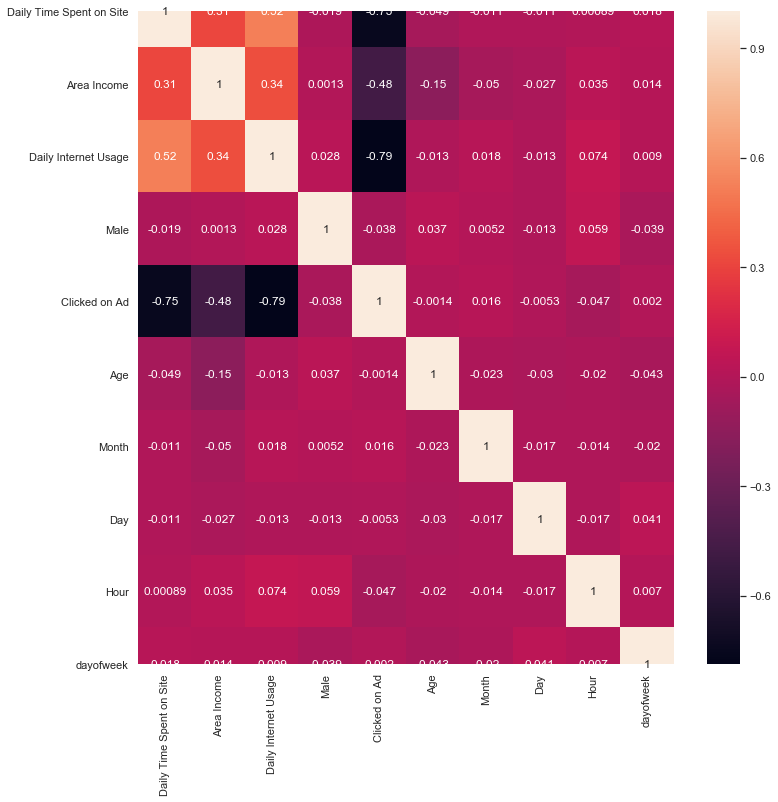

In [24]:
df_ready = df_ready.drop(['Year'], axis=1)

plt.figure(figsize = (12,12))
sns.heatmap(df_ready.corr(), annot = True)

In [25]:
df_ready.corr().abs()['Clicked on Ad'].sort_values(ascending = False)

Clicked on Ad               1.000000
Daily Internet Usage        0.786539
Daily Time Spent on Site    0.748117
Area Income                 0.476255
Hour                        0.047431
Male                        0.038027
Month                       0.016095
Day                         0.005269
dayofweek                   0.002003
Age                         0.001389
Name: Clicked on Ad, dtype: float64

- Mendrop fitur year karena sudah di extract menjadi month week day dan juga dayofweek. Dan juga year itu terlalu luas
- Mengecek korelasi antar kolom dengan fitur fitur baru
- kebanyakan fitur baru tidak berkorelasi

### Checking Outlier

In [26]:
df_test = df_ready[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male', 'Month', 'Day', 'Hour', 'dayofweek','Clicked on Ad']]

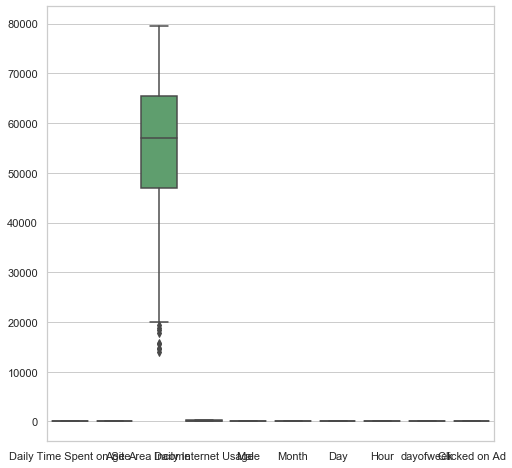

In [27]:
plt.figure(figsize = (8,8))
sns.boxplot(data=df_test)

In [28]:
def find_outlier(df_test):
    Q1 = np.quantile(df_test, .25)
    Q2 = np.quantile(df_test, .50) #median
    Q3 = np.quantile(df_test, .75)

    IQR = (Q3 - Q1) * 1.5
    batas_bawah = Q1 - IQR
    batas_atas = Q3 + IQR
    
      
    outlier = ''
    for i in range(len(df_test)):
        if df_test[i] > batas_atas:
            outlier = outlier + str(df_test[i]) + ', '
        if df_test[i] < batas_bawah:
            outlier = outlier + str(df_test[i]) + ', '
    return outlier

In [29]:
DailyTimeSpent = df_test['Daily Time Spent on Site'].sort_values().values.tolist()
Age = df_test['Age'].sort_values().values.tolist()
AreaIncome = df_test['Area Income'].sort_values().values.tolist()
DailyInternetUsage = df_test['Daily Internet Usage'].sort_values().values.tolist()
Male = df_test['Male'].sort_values().values.tolist()

print('Jumlah outlier feature DailyTimeSpent yaitu:', len(find_outlier(DailyTimeSpent)))
print('Jumlah outlier feature Age yaitu:', len(find_outlier(Age)))
print('Jumlah outlier feature AreaIncome yaitu:', len(find_outlier(AreaIncome)))
print('Jumlah outlier feature DailyInternetUsage yaitu:', len(find_outlier(DailyInternetUsage)))
print('Jumlah outlier feature Male yaitu:', len(find_outlier(Male)))

Jumlah outlier feature DailyTimeSpent yaitu: 0
Jumlah outlier feature Age yaitu: 0
Jumlah outlier feature AreaIncome yaitu: 87
Jumlah outlier feature DailyInternetUsage yaitu: 0
Jumlah outlier feature Male yaitu: 0


Dari hasil pengecekan outlier ternyata ada outlier pada fitur Area Income, kita cek lebih lanjut masing masing outliernya

In [30]:
Q1_amount = df_test['Area Income'].describe()['25%']
Q3_amount = df_test['Area Income'].describe()['75%']
iqr = Q3_amount - Q1_amount

In [31]:
outlier_index = df_test[(df_test['Area Income'] < Q1_amount - (1.5 * iqr)) | (df_test['Area Income']> Q3_amount + (1.5 * iqr)) ].index

In [32]:
df_test.loc[outlier_index]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Month,Day,Hour,dayofweek,Clicked on Ad
135,49.89,0,17709.98,160.03,1,4,16,12,5,1
410,48.09,0,19345.36,180.42,0,5,28,12,5,1
510,57.86,0,18819.34,166.86,0,7,8,17,4,1
640,64.63,1,15598.29,158.80,1,6,12,3,6,1
665,58.05,0,15879.10,195.54,1,2,12,10,4,1
692,66.26,1,14548.06,179.04,1,4,25,19,0,1
768,68.58,0,13996.50,171.54,1,7,6,12,2,1
778,52.67,0,14775.50,191.26,0,5,19,6,3,1
952,62.79,0,18368.57,231.87,1,5,30,20,0,1


- ternyata ada 9 outlier dari fitur Area Income
- Dengan adanya outlier ini akan lebih baik kita scalling pada fitur Area Income untuk memperakurat nanti pada saat modeling.

### Scaling Area Income using Robust Scaler

In [33]:
from sklearn.preprocessing import RobustScaler

df_test['Area Income'] = RobustScaler().fit_transform(df_test[['Area Income']])

In [34]:
df_test.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Month,Day,Hour,dayofweek,Clicked on Ad
0,68.95,0,0.261492,256.09,0,3,27,0,6,0
1,80.23,0,0.619863,193.77,1,4,4,1,0,0
2,69.47,2,0.150424,236.50,0,3,13,20,6,0
3,74.15,0,-0.119645,245.89,1,1,10,2,6,0
4,68.37,0,0.915334,225.58,0,6,3,3,4,0
5,59.99,2,0.149102,226.74,1,5,19,14,3,0
6,88.91,0,-0.171348,208.36,0,1,28,20,3,0
7,66.00,1,-1.758190,131.76,1,3,7,1,0,1
8,74.53,0,0.642649,221.51,1,4,18,9,0,0
9,69.88,2,-0.074299,183.82,1,7,11,1,0,0


In [35]:
df_test.to_csv('advertisingREADY.csv')